<a href="https://colab.research.google.com/github/EmiHamada/Sund_Box/blob/master/Pytourch/tutorial/Image_recognition_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TORCHVISION OBJECT DETECTION FINETUNING TUTORIAL
[画像認識系チュートリアル：物体検出](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html)

[Google Driveとデータ共有](https://blog.shikoan.com/google-colab-drive-save/)

In [3]:
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./gdrive


In [4]:
! ls "./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed"

added-object-list.txt  Annotation  PedMasks  PNGImages	readme.txt


In [5]:
! ls "./gdrive/My Drive/Colab Notebooks"

 coco_eval.py
 coco_utils.py
 engine.py
' Image_recognition_tutorial_1.ipynb'
 OpenCV_training.ipynb
 PennFudanPed.zip
'PennFudanPed.zip (Unzipped Files)'
 PyTourch_tutorial_1.ipynb
'PyTourch_tutorial_1.ipynb のコピー'
 PyTourch_tutorial_2.ipynb
 PyTourch_tutorial_3.ipynb
 PyTourch_tutorial_4.ipynb
'torchvision_finetuning_instance_segmentation.ipynb のコピー'
'torchvision_finetuning_instance_segmentation.ipynb のコピー のコピー'
 transforms.py
'tv-training-code (1).py'
 tv-training-code.py
 Untitled
 utils.py
 技術要件.gdoc


In [11]:
! ls

coco_eval.py   engine.py  sample_data	 utils.py
coco_utils.py  gdrive	  transforms.py


In [0]:
! cp "./gdrive/My Drive/Colab Notebooks/transforms.py" transforms.py

error: ignored

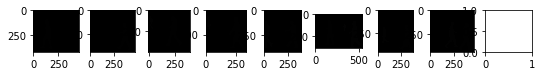

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

subfig = []

fig = plt.figure(figsize=(12, 9))

for i in range(1, 100 + 1):
  subfig.append(fig.add_subplot(10, 12, i))
  # とりあえず出す様に作成。桁数のところは使うときに改良
  img_bgr = cv2.imread("./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed/PedMasks/FudanPed0000"+ str(i+1) + "_mask.png")
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  subfig[i - 1].imshow(img_rgb)

fig.subplots_adjust(wspace = 0.3, hspace = 0.3)

plt.show()


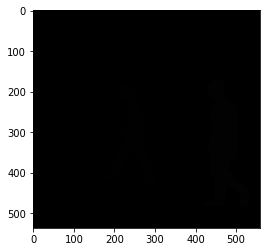

In [0]:
img_bgr = cv2.imread("./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed/PedMasks/FudanPed00001_mask.png")
plt.imshow(img_bgr)
plt.show()

In [0]:
import os
import numpy as np
import torch
from PIL import Image

root = "./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed"

class PennFudanPed(object):
  def __init__(self, root, transforms):
    self.root = root
    self.transforms = transforms
    self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
    self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))

  
  def __getitem__(self, idx):
    img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
    masks_path = os.path.join(self, root, "PedMasks", self.masks[idx])
    img = Image.open(img_path).convert("RGB")

    mask = Image.open(masks_path)

    mask = np.array(mask)

    obj_id = np.unique(mask)

    obj_id = obj_id[1:]

    masks = mask == obj_id[:, None, None]

    num_objs = len(obj_ids)
    boxes = []

    for i in range(num_objs):
      pos = np.where(masks[i])
      xmin = np.min(pos[1])
      xmax = np.max(pos[1])
      ymin = np.min(pos[0])
      ymax = np.max(pos[0])
      boxes.append([xmin,xmax, ymin,ymax])

    
    boxes = torch.as_tensor(boxes, dtype=torch.float32)
    image_id = torch.tensor([idx])
    labels = torch.as_tensor(torch.ones(num_objs,), dtype=torch.int64)
    area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
    iscrowd = torch.zeros((num_objs,), dtype=torch.int36)

    target = {} 
    target['boxes'] = boxes
    target['labels'] = labels
    target["masks"] = masks
    target["image_id"] = image_id
    target["area"] = area
    target["iscrowd"] = iscrowd

    if self.transforms is not None:
            img, target = self.transforms(img, target)

    return img, target

  def __len__(self):
    return len(self.imgs)
  

  def get_model_instance_segmantation(num_classes):
    model = tor


In [6]:
%%shell

# Install pycocotools
git clone https://github.com/cocodataset/cocoapi.git
cd cocoapi/PythonAPI
python setup.py build_ext install

Cloning into 'cocoapi'...
remote: Enumerating objects: 959, done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 959
Receiving objects: 100% (959/959), 11.69 MiB | 37.99 MiB/s, done.
Resolving deltas: 100% (570/570), done.
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/u

In [7]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 6018, done.
remote: Total 6018 (delta 0), reused 0 (delta 0), pack-reused 6018
Receiving objects: 100% (6018/6018), 9.55 MiB | 21.98 MiB/s, done.
Resolving deltas: 100% (4010/4010), done.
Note: checking out 'v0.3.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at be37608 version check against PyTorch's CUDA version


In [8]:
import os
import numpy as np
import torch
from PIL import Image

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

from engine import train_one_epoch, evaluate
import utils
import transforms as T


class PennFudanDataset(object):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(self.root, "PNGImages"))))
        self.masks = list(sorted(os.listdir(os.path.join(self.root, "PedMasks"))))

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(mask_path)

        mask = np.array(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model


def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)
    

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:03<00:00, 56.3MB/s]


Epoch: [0]  [ 0/60]  eta: 0:02:38  lr: 0.000090  loss: 5.9007 (5.9007)  loss_classifier: 0.9736 (0.9736)  loss_box_reg: 0.2374 (0.2374)  loss_mask: 4.6792 (4.6792)  loss_objectness: 0.0064 (0.0064)  loss_rpn_box_reg: 0.0041 (0.0041)  time: 2.6341  data: 1.3836  max mem: 2807
Epoch: [0]  [10/60]  eta: 0:00:28  lr: 0.000936  loss: 1.8124 (2.8816)  loss_classifier: 0.5452 (0.5174)  loss_box_reg: 0.1636 (0.1859)  loss_mask: 1.1125 (2.1438)  loss_objectness: 0.0225 (0.0252)  loss_rpn_box_reg: 0.0054 (0.0092)  time: 0.5793  data: 0.1322  max mem: 3367
Epoch: [0]  [20/60]  eta: 0:00:19  lr: 0.001783  loss: 0.8314 (1.8154)  loss_classifier: 0.2086 (0.3535)  loss_box_reg: 0.1589 (0.1709)  loss_mask: 0.3791 (1.2532)  loss_objectness: 0.0201 (0.0244)  loss_rpn_box_reg: 0.0118 (0.0133)  time: 0.3841  data: 0.0168  max mem: 3368
Epoch: [0]  [30/60]  eta: 0:00:13  lr: 0.002629  loss: 0.5201 (1.3667)  loss_classifier: 0.1210 (0.2691)  loss_box_reg: 0.1219 (0.1508)  loss_mask: 0.2131 (0.9130)  loss_ob

In [13]:
# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2
# use our dataset and defined transformations
dataset = PennFudanDataset("./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed", get_transform(train=True))
dataset_test = PennFudanDataset("./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed", get_transform(train=False))

# split the dataset in train and test set
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=4,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=4,
    collate_fn=utils.collate_fn)

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                                momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

# let's train it for 10 epochs
num_epochs = 10

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

print("That's it!")

Epoch: [0]  [ 0/60]  eta: 0:00:46  lr: 0.000090  loss: 2.3997 (2.3997)  loss_classifier: 0.6942 (0.6942)  loss_box_reg: 0.2591 (0.2591)  loss_mask: 1.3693 (1.3693)  loss_objectness: 0.0660 (0.0660)  loss_rpn_box_reg: 0.0111 (0.0111)  time: 0.7821  data: 0.3109  max mem: 4304
Epoch: [0]  [10/60]  eta: 0:00:20  lr: 0.000936  loss: 1.4724 (1.5096)  loss_classifier: 0.5442 (0.4887)  loss_box_reg: 0.2068 (0.2061)  loss_mask: 0.5425 (0.7793)  loss_objectness: 0.0117 (0.0239)  loss_rpn_box_reg: 0.0105 (0.0115)  time: 0.4103  data: 0.0325  max mem: 4304
Epoch: [0]  [20/60]  eta: 0:00:15  lr: 0.001783  loss: 0.7830 (1.0755)  loss_classifier: 0.2263 (0.3380)  loss_box_reg: 0.1572 (0.1823)  loss_mask: 0.3043 (0.5262)  loss_objectness: 0.0098 (0.0185)  loss_rpn_box_reg: 0.0092 (0.0106)  time: 0.3626  data: 0.0053  max mem: 4304
Epoch: [0]  [30/60]  eta: 0:00:11  lr: 0.002629  loss: 0.4989 (0.8649)  loss_classifier: 0.0879 (0.2529)  loss_box_reg: 0.1474 (0.1684)  loss_mask: 0.2173 (0.4171)  loss_ob

In [0]:
# pick one image from the test set
img, _ = dataset_test[11]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

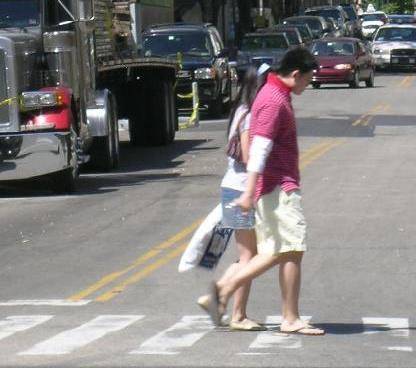

In [19]:
Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())

In [11]:
!ls

cocoapi       coco_utils.py  gdrive	  sample_data	 utils.py
coco_eval.py  engine.py      __pycache__  transforms.py  vision


In [12]:
!ls "./gdrive/My Drive/Colab Notebooks/PennFudanPed.zip (Unzipped Files)/PennFudanPed"

added-object-list.txt  Annotation  PedMasks  PNGImages	readme.txt


In [20]:
prediction

[{'boxes': tensor([[219.3595,  48.0388, 319.6972, 335.4441],
          [190.4455,  55.9423, 280.4331, 318.2647]], device='cuda:0'),
  'labels': tensor([1, 1], device='cuda:0'),
  'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0'),
  'scores': tensor([0.9975, 0.5364], device='cuda:0')}]

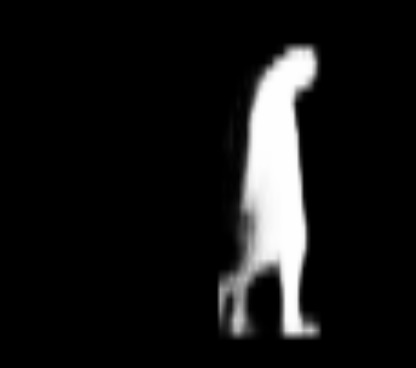

In [21]:
Image.fromarray(prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy())